/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64
****************************************************************************************************
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
****************************************************************************************************
False    5439
True     3037
Name: CryoSleep, dtype: int64
****************************************************************************************************
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
*******************************************

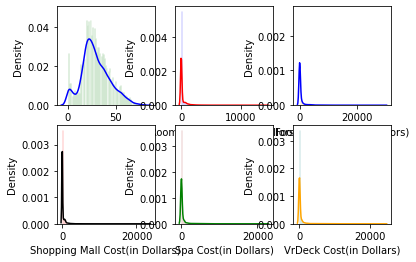

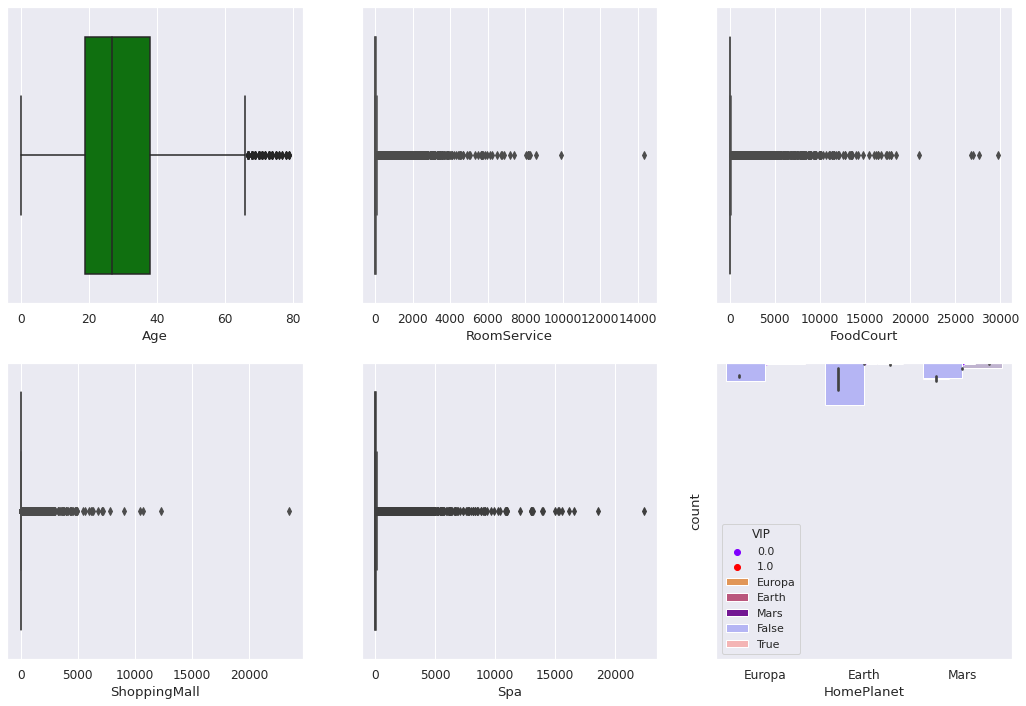

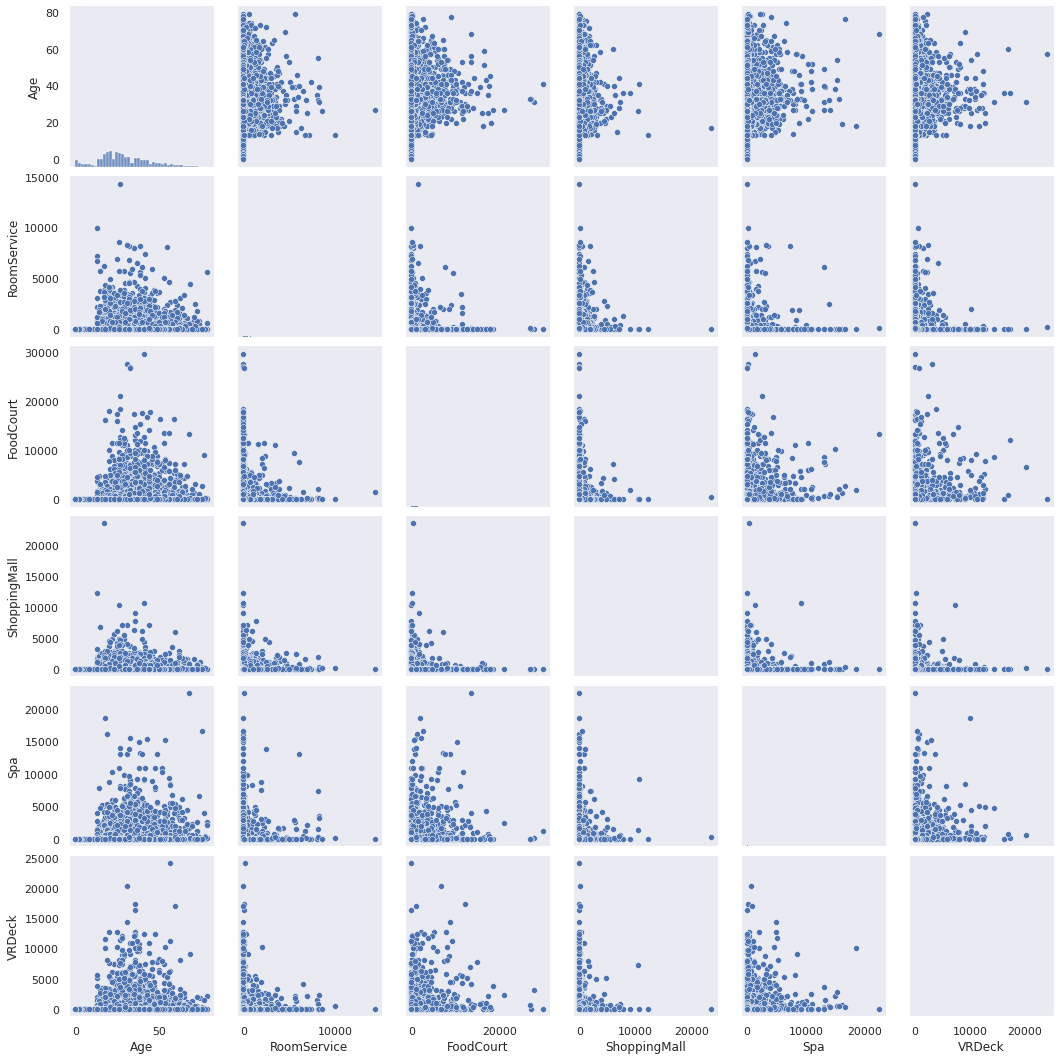

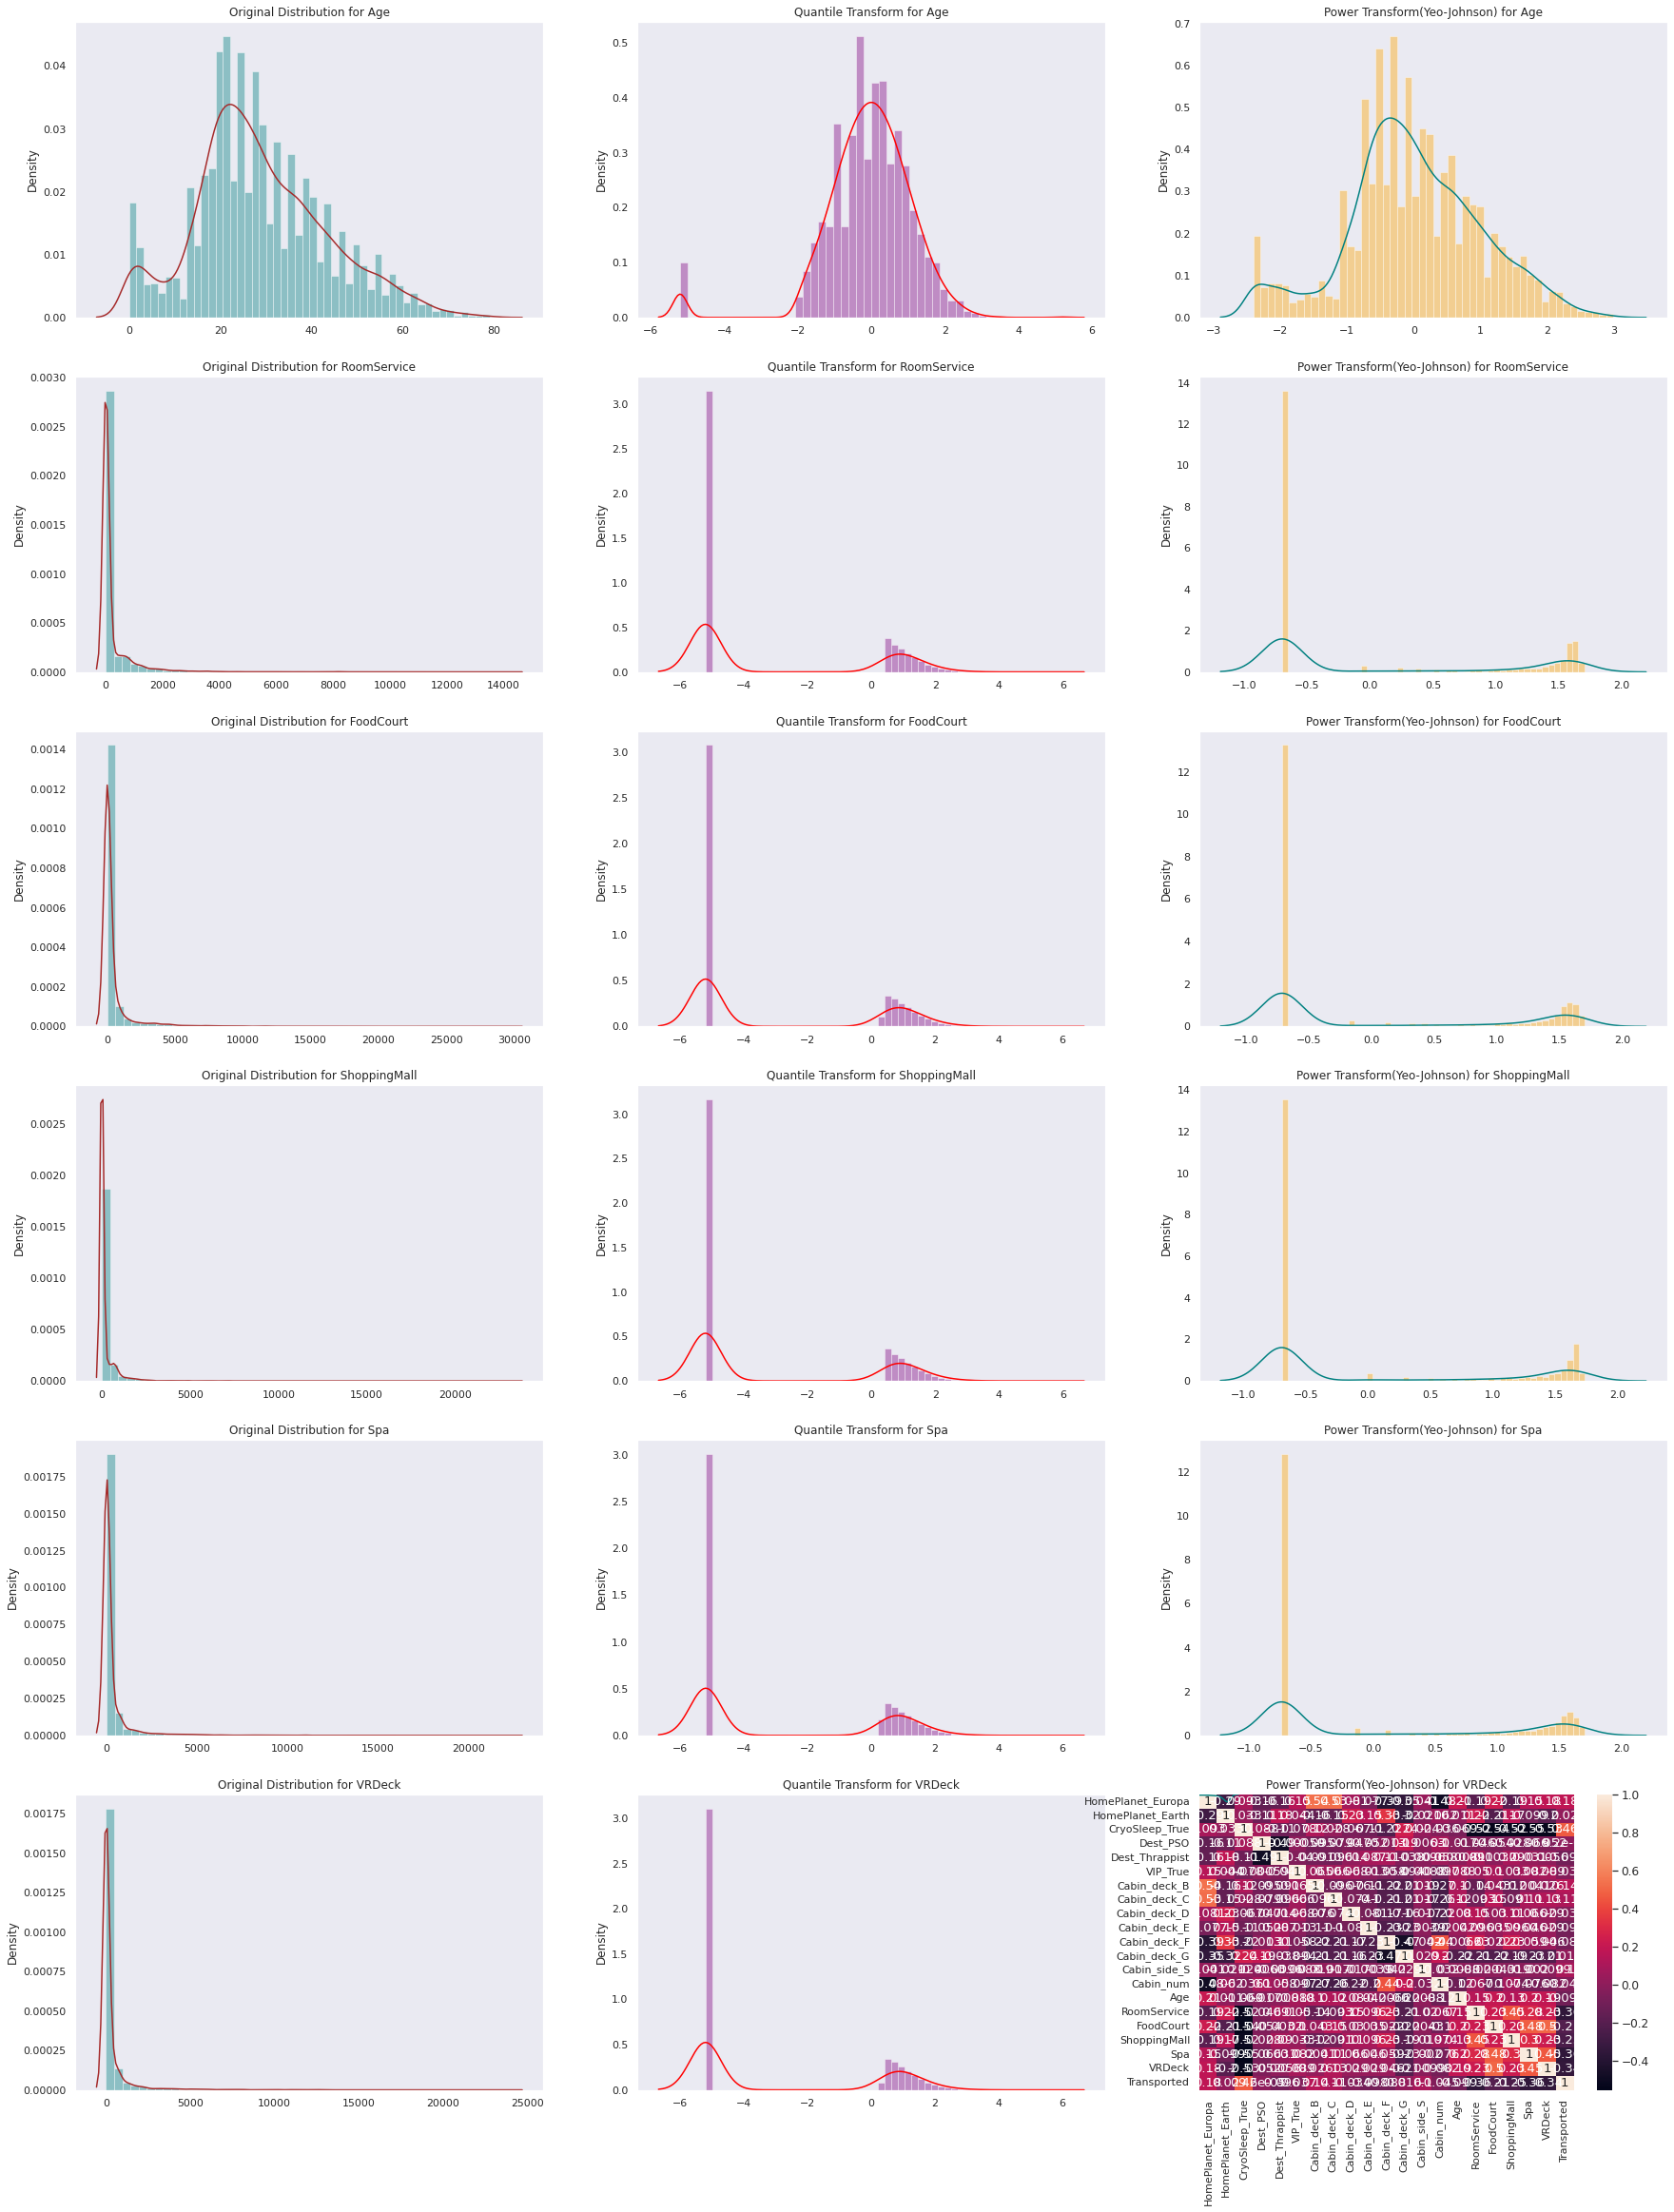

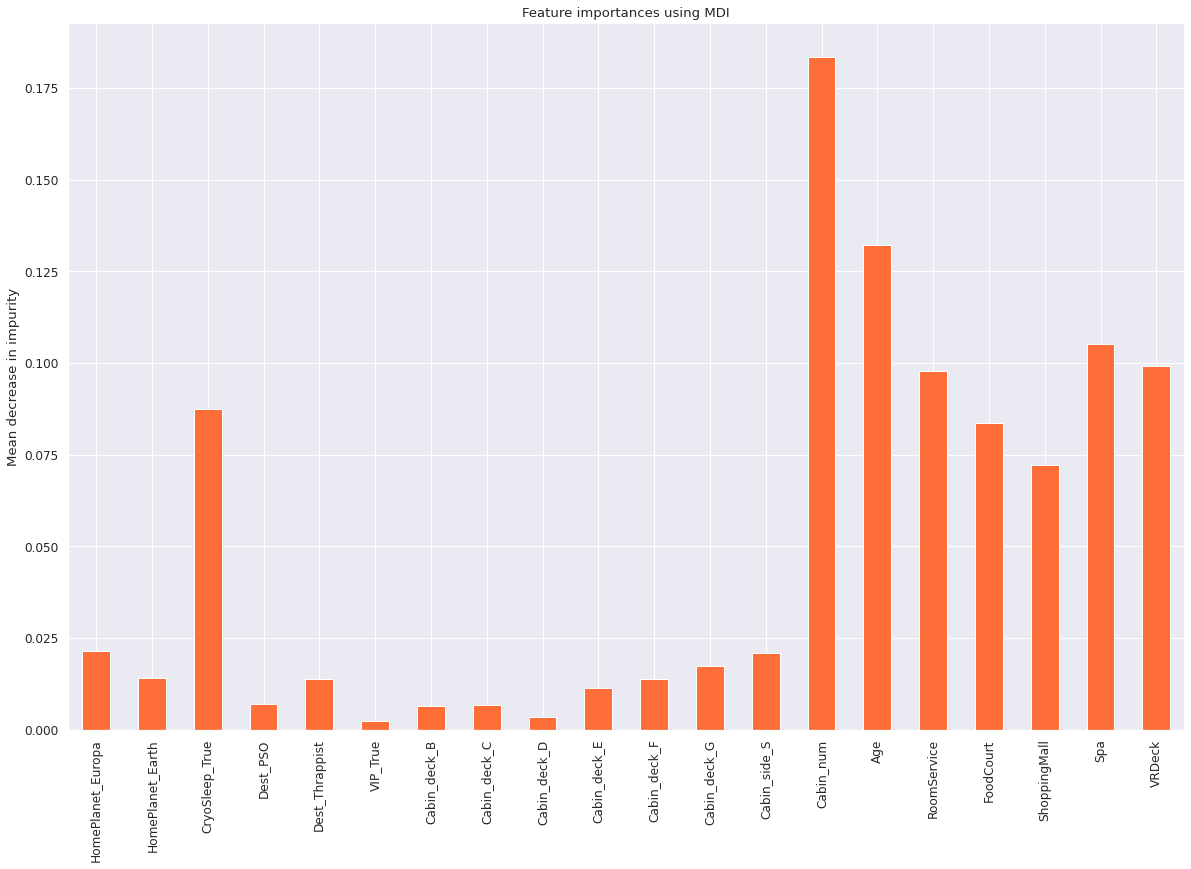

(8693, 15) (4277, 15)


0.9967788484188561
1859.1216204166412


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv(r'/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv(r'/kaggle/input/spaceship-titanic/test.csv')
result = pd.DataFrame(test_data['PassengerId'])
test_data.head(10)

## 1. Checking Features that do not add any meaning or enhance our ML and removing them

for i in train_data.columns:
    print(train_data[i].value_counts())
    print("*"*100)

train_data['PassengerId'].value_counts()
test_data['PassengerId'].value_counts()

train_data['Transported'].value_counts()


# Dataset is Balanced

# As we checked the value_counts of "PassengerId" and each data is a unique identifier which is waste for our model and we 
# know "Name" feature does not add any value to our Model so REMOVING THEM BOTH

train_data = train_data.drop(['PassengerId','Name'],axis = 1)
test_data = test_data.drop(['PassengerId','Name'],axis = 1)

test_data.shape

## 2. Segregating Categorical and Numerical Features from Dataset

categorical_features = []
numerical_features = []
for i in train_data.columns:
    if train_data[i].dtype == 'O':
        categorical_features.append(i)
    elif train_data[i].dtype == 'float' or train_data[i].dtype == 'int':
        numerical_features.append(i)
        
        
print(categorical_features)
print(numerical_features)

## 3. Outlier Detection

train_data[numerical_features].describe()

### Method 1. Checking Skewness of all Numerical Data

# BEST CASE - Skewness should be between -2 and +2 and Kurtosis should nearest to 3 

for i in numerical_features:
    print("Numerical feature : {0}, Skewness: {1}".format(i,train_data[i].skew()))
    print(train_data[i].describe())
    print()
    print("<>"*50)

# OBSERVATION    
# As we see "Age" is under limit but all other bumerical features are Skewed and that too in +ve direction and contains Outliers

### Method 2. Visually plotting all Numerical Features

#### HIST PLOT(KDE)

import seaborn as sns
import matplotlib.pyplot as plt


for i in range(len(numerical_features)):
    fig, axes = plt.subplots(2, 3)
    sns.set(palette='rainbow_r',font_scale=1.1,style = 'darkgrid',rc={"figure.figsize": [18, 12]})
    sns.distplot(train_data[numerical_features[i]],color='green',kde_kws={'color':'blue'},bins=100,axlabel='Age',ax=axes[0,0])
    sns.distplot(train_data[numerical_features[i+1]],color='blue',kde_kws={'color':'red'},bins=100,axlabel='Room Service Cost(in Dollors)',ax=axes[0,1])
    sns.distplot(train_data[numerical_features[i+2]],color='orange',kde_kws={'color':'blue'},bins=100,axlabel='Food Court Cost(in Dollors)',ax=axes[0,2])
    sns.distplot(train_data[numerical_features[i+3]],color='red',kde_kws={'color':'black'},bins=100,axlabel='Shopping Mall Cost(in Dollars)',ax=axes[1,0])
    sns.distplot(train_data[numerical_features[i+4]],color='brown',kde_kws={'color':'green'},bins=100,axlabel='Spa Cost(in Dollars)',ax=axes[1,1])
    sns.distplot(train_data[numerical_features[i+5]],color='teal',kde_kws={'color':'orange'},bins=100,axlabel='VrDeck Cost(in Dollars)',ax=axes[1,2]);
    break
    
# OBSERVATION 
# From here we see "Age" is almost Normal but all others contain Outlirs that are responsible for Right Skewness of Data.
# Going forward for next test

#### Boxplot

for i in range(len(numerical_features)):
    fig, axes = plt.subplots(2, 3)
    sns.set(palette='rainbow_r',font_scale=1.1,style = 'darkgrid',rc={"figure.figsize": [18, 12]})
    sns.boxplot(train_data[numerical_features[i]],color='green',ax=axes[0,0])
    sns.boxplot(train_data[numerical_features[i+1]],color='blue',ax=axes[0,1])
    sns.boxplot(train_data[numerical_features[i+2]],color='orange',ax=axes[0,2])
    sns.boxplot(train_data[numerical_features[i+3]],color='red',ax=axes[1,0])
    sns.boxplot(train_data[numerical_features[i+4]],color='brown',ax=axes[1,1])
    sns.boxplot(train_data[numerical_features[i+5]],color='teal',ax=axes[1,2]);
    break
    
# OBSERVATION
# As we see many data points of all features lie outside of IQR Range so most of them are OUTLIERS 

### Method 3. Performing Shapiro Wilk test to test Normality of Features

from scipy.stats import shapiro


for i in numerical_features:
    print("Numerical feature : {0}  ,  p-value:  {1}".format(i,shapiro(train_data[i])[1]))

    
# OBSERVATION
# From here we can see all Numerical features are showing as Normal but which is not the case here
# We go forward for more Outlier detection and Normality Test

### Method 4. Performing K2 Normality test for checking Normality of Features

from scipy.stats import normaltest

for i in numerical_features:
    print("Numerical feature : {0}  ,  p-value:  {1}".format(i,normaltest(train_data[i],nan_policy='omit')[1]))
    
# OBSERVATION
# From this test we can see all numerical features are considered as Not Gaussian as p-value is < 0.05 so we reject 
# Null Hypothesis which states "All Features are Gaussian/Normal Distributed"

### OBSERVATIONS
#### 1. From all 4 test we found that all numerical features contain outliers and are not Gaussian/Normal distributed.
#### 2. Now, we have to perform OUTLIER Transform to make all features Normal or close to Normal Distribution.
#### 3. Here we have to keep the Outliers and transform them so we are not removing them so IQR and Z-Score is not performed.
#### ***We cannot perform QQPlot as data contains NAN values***

## 4. Visualizing the Complete Dataset using Seaborn and Matplotlib

### Barplot - BiVariate Analysis - Categorical features

sns.set(palette='rainbow',font_scale=1.5,style = 'whitegrid',rc={"figure.figsize": [10, 7]})
sns.barplot(train_data['HomePlanet'],train_data['RoomService'],palette='Accent_r');

# OBSERVATION 
# The people having "Mars" as permanent residence are paying highest to RoomService on Spaceship

sns.set(palette='rainbow',font_scale=1.5,style = 'white',rc={"figure.figsize": [10, 7]})
sns.barplot(x =train_data['Destination'],y = train_data['FoodCourt'],hue=train_data['HomePlanet'],palette='plasma_r');

# OBSERVATION 
# The people having "Europa" as permanent residence("HomePlanet") are paying highest on FoodCourt in Spaceship whether 
# they are travelling to any of the 3 Destination Planets. 

### Scatter Plot - BiVariate Analysis

sns.scatterplot(train_data["Age"],train_data['FoodCourt'],hue=train_data['VIP'],palette='rainbow');

# OBSERVATION
# People of Age between 13 and 70 are billed almost similar i.e greater than 1$ and highest being a VIP paying approx 30000$.

### KDE Plot - Univariate Analysis

sns.set_theme(style='darkgrid')
sns.kdeplot(data=train_data,x = 'Age',hue = 'Destination',multiple='stack',palette='Paired_r')

# OBSERVATION
# Majority of People from all age groups are going to "TRAPPIST-1e" Planet

### Countplot - Relation Plot

sns.set_theme(style='dark',rc={"figure.figsize": [12, 8]})
sns.countplot(train_data['HomePlanet'],hue=train_data['VIP'],palette='bwr');

### Pairplot - Mixed Plot

sns.pairplot(train_data[numerical_features],dropna=True);

## 5. Transforming the features to Normal/Gaussian using Log/Quantile Transformer and other ways

### Testing the results from Quantile Transformer and Power Transformer(Yeo - Johnson).

from sklearn.preprocessing import PowerTransformer,QuantileTransformer


def test_transformers(numerical_features):
    pt = PowerTransformer(method='yeo-johnson')
    qt = QuantileTransformer(output_distribution='normal')
    
    # Don't use output_distributions as "uniform" as it will give a uniform distribution not a Gaussian/Normal Distribution 
    
    fig = plt.figure(figsize=(30,40))
    j = 1
    for i in numerical_features:
        array = np.array(train_data[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = pd.DataFrame(qt.fit_transform(array))
        plt.subplot(6,3,j)
        sns.distplot(array, bins = 50, kde = True,color='teal',kde_kws={'color':'brown'})
        plt.title(f"Original Distribution for {i}")
        plt.subplot(6,3,j+1)
        sns.distplot(x, bins = 50, kde = True,color='purple',kde_kws={'color':'red'})
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(6,3,j+2)
        sns.distplot(y, bins = 50, kde = True,color='orange',kde_kws={'color':'teal'})
        plt.title(f"Power Transform(Yeo-Johnson) for {i}")
        j += 3
        
test_transformers(numerical_features)


# OBSERVATIONS
# 1. Power transformer i.e yeo-johnson performs better than BOX-COX Transform as it can handle -ve values also.
# 2. Quantile Transformer is performing better than Yeo - Johnson Transform so taking it as our main Transformer.
# 3. We are not taking log transform here cause Quantile transformer was giving better results than all others.

### Transforming Numerical Features using Quantile Transformer and making close to "Normal" by this OUTLIERS are also been taken care of.

quant_trans = QuantileTransformer(output_distribution='normal')
for i in numerical_features:
    quant = quant_trans.fit(np.array(train_data[i]).reshape(-1, 1))
    train_data[i] = quant.transform(np.array(train_data[i]).reshape(-1, 1))
    test_data[i] = quant.transform(np.array(test_data[i]).reshape(-1,1))

## 6.   After Outlier Transformation check for Missing data in the new dataset 


train_data.isnull().sum()

train_data.isnull().sum().sum()
print('Percentage of missing data points : ',((train_data.isnull().sum().sum()*100)/train_data.shape[0]).round(4),"%")

test_data.isnull().sum().sum()
print('Percentage of missing data points : ',((test_data.isnull().sum().sum()*100)/test_data.shape[0]).round(4),"%")

for i in train_data.columns:
    print('Percentage of Missing values in each Feature  {0} : {1}'.format(i,((train_data[i].isnull().sum().sum()*100)/(train_data[i].shape[0])).round(4)),'%')

## 7. Doing Imputation for missing data 

from sklearn.impute import SimpleImputer
#from fancyimpute import IterativeImputer

my_imputer_med = SimpleImputer(strategy='median')
#fancy_imputer_mice = IterativeImputer()
my_imputer_mod = SimpleImputer(strategy='most_frequent')

for i in train_data.columns:
    if train_data[i].dtype == 'O':
        imp_mod = my_imputer_mod.fit(np.array(train_data[i]).reshape(-1, 1))
        train_data[i] = imp_mod.transform(np.array(train_data[i]).reshape(-1, 1))
        test_data[i] = imp_mod.transform(np.array(test_data[i]).reshape(-1, 1))
    elif train_data[i].dtype == 'float' or train_data[i].dtype == 'int':
        imp_median = my_imputer_med.fit(np.array(train_data[i]).reshape(-1, 1))
        train_data[i] = imp_median.transform(np.array(train_data[i]).reshape(-1, 1))
        test_data[i] = imp_median.transform(np.array(test_data[i]).reshape(-1, 1))

        
# OBSERVATION
# Imputing Missing values in Categorical Features using "most_frequent" aka mode() technique
# Imputing Missing values in Numerical Features using "median" technique

train_data.isnull().sum()
# As we see no NULL or NAN value is there in dataset

test_data.isnull().sum()
# As we see no NULL or NAN value is there in dataset

## 8. Doing Feature Engineering by creating 3 new features from given 1 feature i.e "Cabin"

train_data['Cabin'].replace(regex=True, inplace=True, to_replace=r'[@#&$%+-/*]', value=r'')
test_data['Cabin'].replace(regex=True, inplace=True, to_replace=r'[@#&$%+-/*]', value=r'')

train_data.head()
test_data.head()

def new_colums(data):
    
    first = []
    last = []
    for i in data['Cabin']:
        first.append(i[0])
        last.append(i[-1])

    data['Cabin_deck'] = pd.DataFrame(first)
    data['Cabin_side'] = pd.DataFrame(last)
    
    return data

new_colums(train_data)
new_colums(test_data)


train_data.shape

train_data['Cabin'].replace(regex=True, inplace=True, to_replace=r'[^0-9]', value=r'')
train_data['Cabin_num'] = train_data['Cabin'].astype(int)


test_data['Cabin'].replace(regex=True, inplace=True, to_replace=r'[^0-9]', value=r'')
test_data['Cabin_num'] = test_data['Cabin'].astype(int)

train_data = train_data.drop('Cabin',axis =1)
test_data = test_data.drop('Cabin',axis =1)

train_data = train_data[['HomePlanet', 'CryoSleep','Cabin_deck', 'Cabin_side', 'Cabin_num','Destination', 'Age', 'VIP',
                         'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported']]
test_data = test_data[['HomePlanet', 'CryoSleep','Cabin_deck', 'Cabin_side', 'Cabin_num','Destination', 'Age', 'VIP',
                         'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

train_data.head(10)
test_data.head(10)

## 9. Converting Categorical Features to Numerical using One Hot Encoding 

categorical_features.extend(['Cabin_deck','Cabin_side'])
categorical_features.remove('Cabin')

categorical_features

for i in categorical_features:
    print(train_data[i].unique())

train_data['Cabin_deck'].value_counts()

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',sparse=False)
ohe.fit(train_data[categorical_features])
ohe.categories_

train_data[['HomePlanet_Europa','HomePlanet_Earth','CryoSleep_True','Dest_PSO','Dest_Thrappist','VIP_True','Cabin_deck_B',
       'Cabin_deck_C','Cabin_deck_D','Cabin_deck_E','Cabin_deck_F','Cabin_deck_G','Cabin_deck_T','Cabin_side_S']] = pd.DataFrame(ohe.transform(train_data[categorical_features]))

test_data[['HomePlanet_Europa','HomePlanet_Earth','CryoSleep_True','Dest_PSO','Dest_Thrappist','VIP_True','Cabin_deck_B',
       'Cabin_deck_C','Cabin_deck_D','Cabin_deck_E','Cabin_deck_F','Cabin_deck_G','Cabin_deck_T','Cabin_side_S']] = pd.DataFrame(ohe.transform(test_data[categorical_features]))


train_data.drop(['HomePlanet','CryoSleep','Cabin_deck','Cabin_side','Destination','VIP','Cabin_deck_T'],axis = 1,inplace=True)
test_data.drop(['HomePlanet','CryoSleep','Cabin_deck','Cabin_side','Destination','VIP','Cabin_deck_T'],axis = 1,inplace=True)

train_data['Transported'] = pd.get_dummies(train_data['Transported'],drop_first=True)

train_data = train_data[['HomePlanet_Europa', 'HomePlanet_Earth',
       'CryoSleep_True', 'Dest_PSO', 'Dest_Thrappist', 'VIP_True',
       'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E',
       'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_side_S',
       'Cabin_num', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck','Transported']]

test_data = test_data[['HomePlanet_Europa', 'HomePlanet_Earth',
       'CryoSleep_True', 'Dest_PSO', 'Dest_Thrappist', 'VIP_True',
       'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E',
       'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_side_S',
       'Cabin_num', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck']]

train_data.head(7)

train_data.isnull().sum()

test_data.isnull().sum()

## 10.Checking Correlation between features

# Here I have taken 0.80 as the threshold for correlation between features

def correlation_check(train_data):
    highly_correlated = []
    for i in train_data.columns:
        for j in train_data.columns:
            if (train_data[i].corr(train_data[j]).round(4) > 0.80 or train_data[i].corr(train_data[j]).round(4) < -0.80) and i != j:
                highly_correlated.append(i,j)
                
                
    return highly_correlated
    
correlation_check(train_data)

if len(correlation_check(train_data)) == 0:
    print("There are no features that are highly correlated to each other")
else:
    print(correlation_check(train_data))

sns.set(palette='rainbow_r',font_scale=1.1,style = 'darkgrid',rc={"figure.figsize": [20, 13]})
sns.heatmap(train_data.corr(),annot=True);

X = train_data.drop('Transported',axis =1)
y = train_data['Transported']

## 11. Feature Importances and Feature Selection(INTRINSIC) - Here we are using Random Forest Classifier for both of them.

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X,y)

rf.score(X,y)

rf.feature_importances_

forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.show()

## 12. Feature Selection

X_train = X.drop(['VIP_True','Dest_PSO','Cabin_deck_B','Cabin_deck_C','Cabin_deck_D'],axis=1)
X_test = test_data.drop(['VIP_True','Dest_PSO','Cabin_deck_B','Cabin_deck_C','Cabin_deck_D'],axis=1)

# OBSERVATION 
# Here we are removing features manually as Number of features are less in this case otherwise we would have made a fxn for this task

print(X_train.shape,X_test.shape)

## 13. Doing Trial and Error for Model Building 

from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import optuna

## 14. Model Building

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
import time
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=30,weights='distance',algorithm='kd_tree')
dt = DecisionTreeClassifier(criterion='gini',max_depth=40,max_features='sqrt')
rf = RandomForestClassifier(n_estimators=4888)
gbdt = GradientBoostingClassifier(n_estimators=5000,max_depth=12,subsample=0.75,learning_rate=0.03)
xgb = XGBClassifier(n_estimators = 3200, max_depth = 16, learning_rate = 0.75,eval_metric = 'logloss')
lgbm = LGBMClassifier(boosting_type='gbdt',learning_rate= 0.787,n_estimators=5800,num_leaves=33,max_depth=31)
cbc = CatBoostClassifier(silent=True,task_type='GPU',n_estimators=10000,max_depth=9,learning_rate=0.68,
                        bootstrap_type='Bayesian', bagging_temperature=8)

vc = VotingClassifier([('K-NN',knn),('DecisionTree', dt),('RandomForestClassifier',rf),('Gradient Boost',gbdt),
                       ('XG Boost', xgb),('LightGBM',lgbm),('CatboostClassifier',cbc)]
                     ,n_jobs = 4)
vc.fit(X_train,y)

end_time = time.time()

print(r2_score(y_pred=vc.predict(X_train),y_true=y))
print(end_time-start_time)

result['Transported'] = vc.predict(X_test)

result['Transported'].replace(inplace=True, to_replace=(1,0), value=(True,False))

result.to_csv(r'C:\Users\trash\Downloads\Kaggle Datasets\SpaceShip Titanic\final_submission_Trash_Voting.csv',index=False)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session